# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name:
* Student Net ID:
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

class Die():
    '''A die has N sides, or “faces”, and W weights, and can be rolled to select a face
    - W defaults to 1.0 for each face but can be changed after the object is created.Note that the weights 
        are just numbers, not a normalized probability distribution.
    - The die has one behavior, which is to be rolled one or more times.
    - Note that what we are calling a “die” here can be any discrete random variable associated with a
        stochastic process, such as using a deck of cards or flipping a coin or speaking a language. 
        Our probability model for such variable is, however, very simple 
        – since our weights apply to only to single events, we are 
        assuming that the events are independent. This makes sense 
        for coin tosses but not for language use.

    '''
    
    def __init__(self, faces):
        ''' An Initializer
        - Takes an array of faces as an argument. The array's data type (dtype) may be strings or numbers.
        - Internally iInitializes the weights to 1.0 for each face.
        - Saves both faces and weights into a private dataframe that is to be shared by the other methods.
        '''
        self.faces = faces
        self.W = [1.0] * len(self.faces)
        self.die = pd.DataFrame({'face' : self.faces, 'weight' : self.W})
        
    def change_weight(self, face, new_weight):
        ''' A method to change the weight of a single side
        - Takes two arguments: the face value to be changed and the new weight.
        - Checks to see if the face passed is valid; is it in the array of weights?
        - Checks to see if the weight is valid; is it a float? Can it be converted to one?
        '''
        if face in self.faces:
            if type(new_weight) == float:
                self.W[self.faces.index(face)] = new_weight
                self.die.at[self.faces.index(face), 'weight'] = new_weight
            else: 
                print(f'{new_weight} is not a float')
        else:
            print(f'{face} is not a face on the die')
            
    def roll(self, nrolls = 1):
        '''A method to roll the die one or more times.
        - Takes a parameter of how many times the die is to be rolled; defaults to 1. 
        - This is essentially a random sample from the vector of faces according to the weights.
        - Returns a list of outcomes.
        - Does not store internally these results.
        '''
        return(random.choices(self.faces, weights=self.W, k=nrolls))
            
    def show_die(self):
        '''A method to show the user the die’s current set of faces and weights (since the latter can be changed).
        - Returns the dataframe created in the initializer.
        '''
        return(self.die)
    
class Game():
    '''A game consists of rolling of one or more dice of the same kind one or more times.
    - Each game is initialized with one or more of similarly defined dice (Die objects).
    - By “same kind” and “similarly defined” we mean that each die in a given game has the same number of sides and associated 
        faces, but each die object may have its own weights.
    - The class has a behavior to play a game, i.e. to rolls all of the dice a given number of times.
    - The class keeps the results of its most recent play.
    '''
    
    def __init__(self, dice):
        '''An initializer
        - Takes a single parameter, a list of already instantiated 
            similar Die objects
        '''
        self.dice = dice
        
    def play(self, krolls):
        '''A play method
        - Takes a parameter to specify how many times the dice should be rolled.
        - Saves the result of the play to a private dataframe of shape N rolls by M dice.
        - The private dataframe should have the roll number is a named index.
        - This results in a table of data with columns for roll number, the die number (its list index), 
            and the face rolled in that instance.
        '''
        self.playdf = pd.DataFrame(columns = range(1, 1+krolls))
        for die in self.dice:
            self.playdf.loc[len(self.playdf)] = die.roll(krolls)
        self.playdf.index += 1
            
    def show_game(self, form = 'wide'):
        '''A method to show the user the results of the most recent play.
        - This method just passes the private dataframe to the user.
        - Takes a parameter to return the dataframe in narrow or wide form.
        - This parameter defaults to wide form.
        - This parameter should raise an exception of the user passes an invalid option.
        - The narrow form of the dataframe will have a twocolumn index with the roll number and the die number, 
            and a column for the face rolled.
        - The wide form of the dataframe will a single column index with the roll number, and each die number as a column.
        '''
        if form == 'wide':
            return(self.playdf)
        elif form == 'narrow':
            return(self.playdf.melt(var_name = 'Roll', value_name = 'face', ignore_index=False))
        else:
            print(f'{form} is not a valid form, choose wide or narrow')
            
class Analyzer():
    '''
    An analyzer takes the results of a single game and computes various 
    descriptive statistical properties about it. These properties results are 
    available as attributes of an Analyzer object.
    '''
    
    def __init__(self, game):
        '''An initializer
        - Takes a game object as its input parameter. 
        - At initialization time, it also infers the data type of the die faces used.

        '''
        self.game = game
        
    def jackpot(self):
        '''A jackpot method to compute how many times the game resulted in all faces being identical.
        - Returns an integer for the number times to the user.
        - Stores the results as a dataframe of jackpot results in a public attribute.
        - The dataframe should have the roll number as a named index
        '''
        count = 0
        for i in range(self.game.playdf.shape[1]):
            col = list((self.game.playdf[i+1]))
            for value in col:
                check = True
                first = col[0]
                if value != first:
                    check = False
                    break
            
            if check == True:
                count += 1
            else:
                continue
        return(count)
    
    def combo(self):
        '''A combo method to compute the distinct combinations of faces rolled, along with their counts.
        - Combinations should be sorted and saved as a multi columned index.
        - Stores the results as a dataframe in a public attribute.
        '''
        self.combos = pd.DataFrame(columns = ['combos'])
        for i in range(self.game.playdf.shape[1]):    
            col = list((self.game.playdf[i+1]))
            self.combos.loc[len(self.combos)] = [col]
        self.combos = self.combos['combos'].value_counts().reset_index(name='counts')
        return(self.combos)

    def face_count(self):
        '''A face counts per roll method to compute how many times a given face is rolled in each event.
        - Stores the results as a dataframe in a public attribute.
        - The dataframe has an index of the roll number and face values as columns (i.e. it is in wide format).
        '''
        self.game_counts = pd.DataFrame(columns = self.game.dice[1].faces)
        for i in range(self.game.playdf.shape[1]):
            col = self.game.playdf[i+1]
            roll_counts = [0]*len(self.game.dice[1].faces)
            for value in col:
                roll_counts[value-1] += 1
            self.game_counts.loc[len(self.game_counts)] = roll_counts
        self.game_counts.index += 1
        return(self.game_counts)      

# Test Module

In [ ]:
import pandas as pd
import random
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import unittest

class MonteCarloTestSuite(unittest.TestCase):
    
    def test_1_change_weight(self):
        obj = Die([1,2,3])
        obj.change_weight(2, 3.0)
        test_list = [1.0, 3.0, 1.0]
        expected = True
        self.assertEqual(obj.W == test_list, expected)
        
    def test_2_change_weight(self):
        obj = Die([1,2,3])
        obj.change_weight(2, 3)
        test_list = [1.0, 1.0, 1.0]
        expected = True
        self.assertEqual(obj.W == test_list, expected)
        
    def test_3_change_weight(self):
        obj = Die([1,2,3])
        obj.change_weight(4, 3.0)
        test_list = [1.0, 1.0, 1.0]
        expected = True
        self.assertEqual(obj.W == test_list , expected)
        
    def test_4_roll(self):
        obj = Die([1,2,3,4,5,6])
        output = obj.roll(3)
        expected = 3
        self.assertEqual(len(output), expected)
        
    def test_5_roll(self):
        obj = Die([1,2,3,4,5,6])
        output = obj.roll()[0]
        expected = True
        self.assertEqual(output in obj.faces, expected)
        
    def test_6_show_die(self):
        obj = Die([1,2,3])
        test_df = pd.DataFrame({
            'face' : [1,2,3],
            'weight' : [1.0,1.0,1.0]
        })
        expected = True
        self.assertEqual(obj.show_die().equals(test_df), expected)
        
    def test_7_play(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        obj = Game(dice)
        obj.play(4)
        test_tuple = (3, 4)
        expected = True
        self.assertEqual(obj.playdf.shape == test_tuple, expected)
        
    def test_8_show_game(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        obj = Game(dice)
        obj.play(4)
        test_tuple = (3, 4)
        expected = True
        self.assertEqual(obj.show_game().shape == test_tuple, expected)
        
    def test_9_show_game(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        obj = Game(dice)
        obj.play(4)
        test_tuple = (12, 2)
        expected = True
        self.assertEqual(obj.show_game('narrow').shape == test_tuple, expected)
        
    def test_10_jackpot(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        game = Game(dice)
        game.play(4)
        game.playdf = pd.DataFrame({
            1 : [1,1,2],
            2 : [2,2,3],
            3 : [1,3,1],
            4 : [3,2,2]
        })
        game.playdf.index += 1
        obj = Analyzer(game)
        expected = 0
        self.assertEqual(obj.jackpot(), expected)
        
    def test_11_jackpot(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        game = Game(dice)
        game.play(4)
        game.playdf = pd.DataFrame({
            1 : [1,1,2],
            2 : [2,2,3],
            3 : [1,1,1],
            4 : [3,2,2]
        })
        game.playdf.index += 1
        obj = Analyzer(game)
        expected = 1
        self.assertEqual(obj.jackpot(), expected)
        
    def test_12_combo(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        game = Game(dice)
        game.play(4)
        game.playdf = pd.DataFrame({
            1 : [1,1,2],
            2 : [2,2,3],
            3 : [1,3,1],
            4 : [3,2,2]
        })
        game.playdf.index += 1
        obj = Analyzer(game)
        test_tuple = (4, 2)
        expected = True
        self.assertEqual(obj.combo().shape == test_tuple, expected)
    
    def test_13_combo(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        game = Game(dice)
        game.play(4)
        game.playdf = pd.DataFrame({
            1 : [1,1,2],
            2 : [1,1,2],
            3 : [1,3,1],
            4 : [1,3,1]
        })
        game.playdf.index += 1
        obj = Analyzer(game)
        test_tuple = (2, 2)
        expected = True
        self.assertEqual(obj.combo().shape == test_tuple, expected)
        
    def test_14_face_count(self):
        die1 = Die([1,2,3])
        die2 = Die([1,2,3])
        die3 = Die([1,2,3])
        dice = [die1, die2, die3]
        game = Game(dice)
        game.play(4)
        game.playdf = pd.DataFrame({
            1 : [1,1,2],
            2 : [2,3,3],
            3 : [1,3,1],
            4 : [3,2,2]
        })
        game.playdf.index += 1
        obj = Analyzer(game)
        test_df = pd.DataFrame({
            1 : [2,1,1,0],
            2 : [1,1,0,2],
            3 : [0,2,1,1]
        })
        test_df.index += 1
        expected = True
        self.assertEqual(obj.face_count().equals(test_df), expected)
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

# Test Results

In [ ]:
test_10_jackpot (__main__.MonteCarloTestSuite) ... ok
test_11_jackpot (__main__.MonteCarloTestSuite) ... ok
test_12_combo (__main__.MonteCarloTestSuite) ... ok
test_13_combo (__main__.MonteCarloTestSuite) ... ok
test_14_face_count (__main__.MonteCarloTestSuite) ... ok
test_1_change_weight (__main__.MonteCarloTestSuite) ... ok
test_2_change_weight (__main__.MonteCarloTestSuite) ... ok
test_3_change_weight (__main__.MonteCarloTestSuite) ... ok
test_4_roll (__main__.MonteCarloTestSuite) ... ok
test_5_roll (__main__.MonteCarloTestSuite) ... ok
test_6_show_die (__main__.MonteCarloTestSuite) ... ok
test_7_play (__main__.MonteCarloTestSuite) ... ok
test_8_show_game (__main__.MonteCarloTestSuite) ... ok
test_9_show_game (__main__.MonteCarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 14 tests in 0.136s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

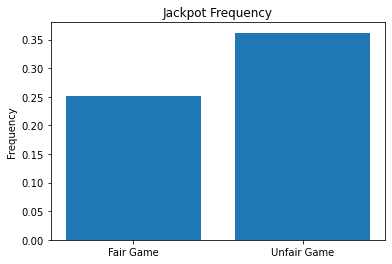

In [2]:
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5.0)
fair_coins = [fair_coin, fair_coin, fair_coin]
unfair_coins = [fair_coin, unfair_coin, unfair_coin]

fair_game = Game(fair_coins)
unfair_game = Game(unfair_coins)
fair_game.play(1000)
unfair_game.play(1000)

fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)

fair_freq = fair_analyzer.jackpot()/fair_game.playdf.shape[1]
unfair_freq = unfair_analyzer.jackpot()/unfair_game.playdf.shape[1]

freq = {
    'Fair Game' : fair_freq,
    'Unfair Game' : unfair_freq
}
plt.bar(freq.keys(), freq.values())
plt.ylabel("Frequency")
plt.title('Jackpot Frequency');

## Scenario 2

In [3]:
die1 = Die([1,2,3,4,5,6])
die2 = Die([1,2,3,4,5,6])
die3 = Die([1,2,3,4,5,6])
die2.change_weight(6, 5.0)
die3.change_weight(1, 5.0)

fair_dice = [die1,die1,die1,die1,die1]
unfair_dice = [die2,die2,die3,die1,die1]

fair_dicegame = Game(fair_dice)
unfair_dicegame = Game(unfair_dice)
fair_dicegame.play(10000)
unfair_dicegame.play(10000)

fair_diceanalyzer = Analyzer(fair_dicegame)
unfair_diceanalyzer = Analyzer(unfair_dicegame)
fair_dicefreq = fair_diceanalyzer.jackpot()/fair_dicegame.playdf.shape[1]
unfair_dicefreq = unfair_diceanalyzer.jackpot()/unfair_dicegame.playdf.shape[1]

dicefreq = {
    'Fair Game' : fair_dicefreq,
    'Unfair Game' : unfair_dicefreq
}

fair_dicecombos = fair_diceanalyzer.combo()[1:11]
unfair_dicecombos = unfair_diceanalyzer.combo()[1:11]

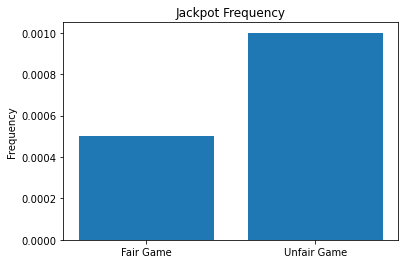

In [4]:
plt.bar(dicefreq.keys(), dicefreq.values())
plt.ylabel("Frequency")
plt.title('Jackpot Frequency');

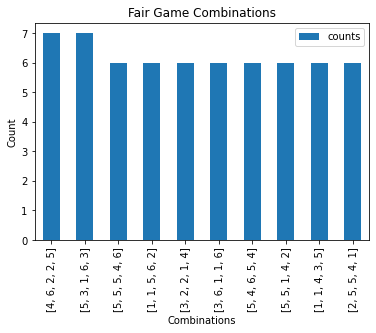

In [5]:
fair_dicecombos.plot.bar(x='index', y='counts')
plt.ylabel("Count")
plt.xlabel('Combinations')
plt.title("Fair Game Combinations");

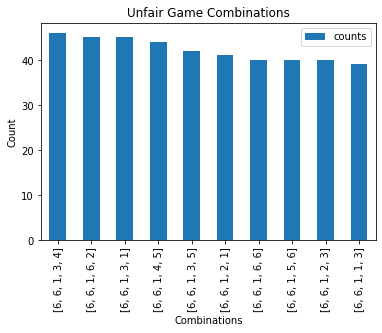

In [6]:
unfair_dicecombos.plot.bar(x='index', y='counts')
plt.ylabel("Count")
plt.xlabel('Combinations')
plt.title("Unfair Game Combinations");

## Scenario 3

In [7]:
alph = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])
alph.change_weight('a', 8.4966)
alph.change_weight('b', 2.0720)
alph.change_weight('c', 4.5388)
alph.change_weight('d', 3.3844)
alph.change_weight('e', 11.1607)
alph.change_weight('f', 1.8121)
alph.change_weight('g', 2.4705)
alph.change_weight('h', 3.0034)
alph.change_weight('i', 7.5448)
alph.change_weight('j', 0.1965)
alph.change_weight('k', 1.1016)
alph.change_weight('l', 5.4893)
alph.change_weight('m', 3.0129)
alph.change_weight('n', 6.6544)
alph.change_weight('o', 7.1635)
alph.change_weight('p', 3.1671)
alph.change_weight('q', 0.1962)
alph.change_weight('r', 7.5809)
alph.change_weight('s', 5.7351)
alph.change_weight('t', 6.9509)
alph.change_weight('u', 3.6308)
alph.change_weight('v', 1.0074)
alph.change_weight('w', 1.2899)
alph.change_weight('x', 0.2902)
alph.change_weight('y', 1.7779)
alph.change_weight('z', 0.2722)
alph_list = [alph,alph,alph,alph,alph]
alph_game = Game(alph_list)
alph_game.play(1000)
alph_analyzer = Analyzer(alph_game)
alph_analyzer.combo()

,index,counts
0,"[n, n, e, a, l]",1
1,"[m, f, d, e, a]",1
2,"[e, t, a, e, r]",1
3,"[e, r, e, l, e]",1
4,"[s, s, c, n, n]",1
...,...,...
995,"[c, t, h, p, d]",1
996,"[d, t, h, o, s]",1
997,"[s, g, i, i, o]",1
998,"[m, c, p, r, s]",1


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [8]:
!ls -lRF -o

.:
total 100
-rw-r--r-- 1 ahg8ee 73179 Apr 30 14:22 FinalProjectSubmission.ipynb
-rw-r--r-- 1 ahg8ee  1074 Apr 30 14:34 LICENSE
drwxr-sr-x 3 ahg8ee  1536 Apr 30 13:09 monte_carlo/
drwxr-sr-x 2 ahg8ee  2048 Apr 30 14:22 monte_carlo_simulator.egg-info/
-rw-r--r-- 1 ahg8ee    15 Apr 30 14:34 README.md
-rw-r--r-- 1 ahg8ee   151 Apr 25 17:24 setup.py
drwxr-sr-x 2 ahg8ee  1024 Apr 30 14:17 tests/

./monte_carlo:
total 16
-rw-r--r-- 1 ahg8ee    0 Apr 25 17:22 __init__.py
-rw-r--r-- 1 ahg8ee 7885 Apr 30 13:09 montecarlo.py

./monte_carlo_simulator.egg-info:
total 16
-rw-r--r-- 1 ahg8ee   1 Apr 30 14:22 dependency_links.txt
-rw-r--r-- 1 ahg8ee 202 Apr 30 14:22 PKG-INFO
-rw-r--r-- 1 ahg8ee 238 Apr 30 14:22 SOURCES.txt
-rw-r--r-- 1 ahg8ee  12 Apr 30 14:22 top_level.txt

./tests:
total 16
-rw-r--r-- 1 ahg8ee 5217 Apr 30 10:43 monte_carlo_test.py
-rw-r--r-- 1 ahg8ee  859 Apr 30 14:17 monte_carlo_testresults.txt


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [2]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/ahg8ee/Doccuments/MSDS/DS5100/Project
  Running setup.py develop for monte-carlo-simulator
